In [1]:
import geopandas as gpd
import pandas as pd
from datetime import datetime

c:\Users\peteramerkhanian\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_18920\3971997994.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shap

In [45]:
df = pd.read_csv("Neighborhood_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
condos = pd.read_csv("Neighborhood_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv")

In [46]:
df = df[df['State'] == 'CA']
condos = condos[condos['State'] == 'CA']

In [47]:
def city_time_series(City, df):
    city = df[df['City'] == City]
    times_series = city[
        city.columns[pd.Series(city.columns).str.match(r"\d\d\d\d-\d\d-\d\d")]
    ].T
    times_series.columns = city['RegionName']
    return times_series

def report(city, start):
    years = (datetime.now() - pd.to_datetime(start)).days / 365.25
    return pd.DataFrame({
        'pct_change': city.loc[start:].pct_change().dropna().add(1).cumprod().add(-1).iloc[-1],
        'mean_growth': city.loc[start:].pct_change().dropna().add(1).cumprod().add(-1).iloc[-1] / years,
        'dollar_change': city.loc[start:].diff().dropna().cumsum().iloc[-1],
        'starting_price': city.loc[start],
        'ending_price': city.iloc[-1]
    }).sort_values(by='pct_change')

In [48]:
berkeley_condos = city_time_series("Oakland", df)
berkeley_sfh = city_time_series("Berkeley", df)
first_richmond_date = berkeley_condos.dropna().iloc[0].name
date = "2015-01-31"
report(berkeley_condos, first_richmond_date)

C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_18920\2523796793.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  'pct_change': city.loc[start:].pct_change().dropna().add(1).cumprod().add(-1).iloc[-1],
C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_18920\2523796793.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  'mean_growth': city.loc[start:].pct_change().dropna().add(1).cumprod().add(-1).iloc[-1] / years,


,pct_change,mean_growth,dollar_change,starting_price,ending_price
RegionName,,,,,
Chinatown,-0.181624,-0.023975,-88354.522595,537504.443474,439880.726234
Old City,-0.150074,-0.019810,-92396.758764,689687.556186,586183.659841
Northgate,-0.138426,-0.018273,-109533.600678,850521.021216,732786.492208
Lake Merritt,-0.105217,-0.013889,-75273.582591,956011.671245,855422.532566
Grand Lake,-0.095334,-0.012584,-38852.659489,640964.323582,579858.715670
...,...,...,...,...,...
South Stonehurst,0.387121,0.051101,108333.482474,344229.225551,477487.708932
Brookfield Village,0.390411,0.051535,113937.208731,342828.758730,476672.793995
Iveywood,0.395965,0.052268,125602.533678,348649.747977,486702.673005


In [49]:
report(berkeley_sfh, first_richmond_date)

,pct_change,mean_growth,dollar_change,starting_price,ending_price
RegionName,,,,,
Gourmet Ghetto,0.059605,0.007868,60216.110716,1.010259e+06,1.070475e+06
North Campus,0.068456,0.009036,60370.673212,8.818876e+05,9.422583e+05
Northwest Berkeley,0.149107,0.019682,118960.505211,7.978218e+05,9.167823e+05
Poet's Corner,0.167489,0.022109,146311.700835,8.735611e+05,1.019873e+06
Elmwood,0.174458,0.023029,168537.365904,9.660611e+05,1.134598e+06
Southwest Berkeley,0.178631,0.023580,146602.588603,8.207012e+05,9.673038e+05
Ashby,0.201894,0.026650,160097.799971,7.929797e+05,9.530775e+05
Westbrae,0.218161,0.028798,191960.562346,8.799048e+05,1.071865e+06
North Berkeley,0.230310,0.030401,206293.974305,8.957211e+05,1.102015e+06


In [51]:
import matplotlib.pyplot as plt

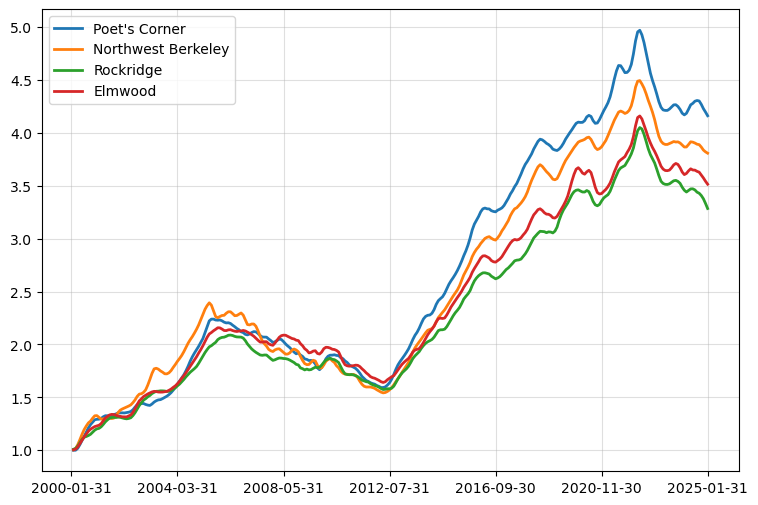

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))
pd.DataFrame([
              berkeley_sfh["Poet's Corner"],
              berkeley_sfh["Northwest Berkeley"],
              berkeley_condos['Rockridge'],
              berkeley_sfh['Elmwood']],).T.fillna(0).pct_change().add(1).cumprod().plot(linewidth=2, ax=ax)
ax.grid(alpha=.4)